In [1]:
!pip install yfinance

In [2]:
## Importing the Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
## Loading the data
df = yf.download("AAPL",start = "2015-01-01",end="2023-12-31")
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.320431,24.789800,23.879980,24.778677,212818400
2015-01-05,23.635292,24.169172,23.448435,24.089090,257142000
2015-01-06,23.637512,23.897778,23.274918,23.699798,263188400
2015-01-07,23.968960,24.069062,23.735387,23.846612,160423600
2015-01-08,24.889900,24.947738,24.180285,24.298185,237458000


In [5]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=2264, freq=None)

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2015-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   2264 non-null   float64
 1   (High, AAPL)    2264 non-null   float64
 2   (Low, AAPL)     2264 non-null   float64
 3   (Open, AAPL)    2264 non-null   float64
 4   (Volume, AAPL)  2264 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 106.1 KB
None


In [7]:
## Checking the stats on data
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03
mean,81.673040,82.500388,80.763437,81.604385,1.237607e+08
std,56.182341,56.757619,55.545175,56.127500,6.818458e+07
min,20.674530,20.978908,20.475430,20.596724,2.404830e+07
25%,32.926908,33.123757,32.745148,32.939109,7.831732e+07
50%,51.395994,52.210087,51.020440,51.543372,1.056556e+08
75%,139.493004,141.184967,136.983560,139.434335,1.486811e+08
max,196.927673,198.428656,195.824279,196.838214,6.488252e+08


In [8]:
print(df.columns)

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [9]:
## Checking Missing Values
df.isnull().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [10]:
## Checking duplicate values
df.duplicated().any()

False

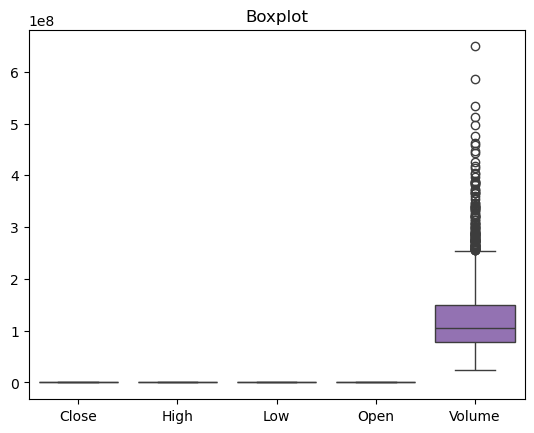

In [11]:
##Checking outliers
sns.boxplot(df)
plt.title("Boxplot")
plt.show()

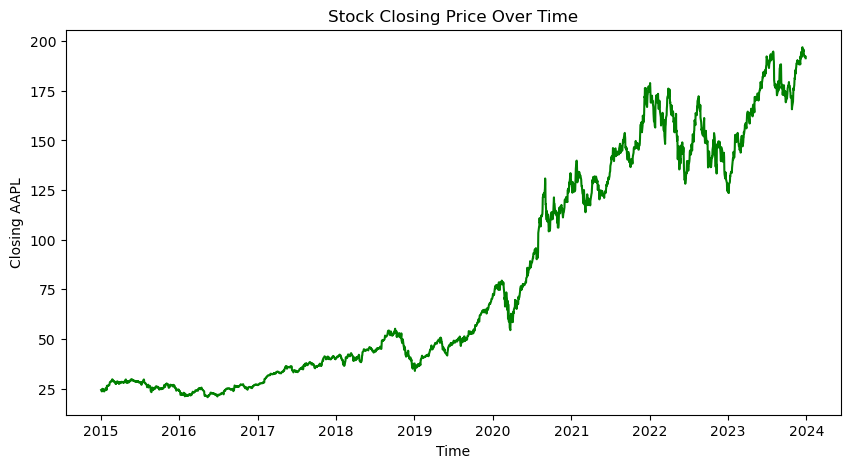

In [12]:
plt.figure(figsize=(10,5))
plt.plot(df['Close'], color = 'g')
plt.xlabel("Time")
plt.ylabel("Closing AAPL")
plt.title("Stock Closing Price Over Time")
plt.show()

### Understanding the Technical Indicators useful for stock prediction using this data
- https://www.investopedia.com/articles/active-trading/011815/top-technical-indicators-rookie-traders.asp

In [14]:
import talib

In [15]:
print(talib.__version__)

0.4.32


In [16]:
## Calculating Indicators
df['EMA 200'] = talib.EMA(df[('Close','AAPL')], timeperiod=200)
df['EMA 50'] = talib.EMA(df[('Close','AAPL')], timeperiod=50)
df['RSI'] = talib.RSI(df[('Close','AAPL')], timeperiod =14)
df['Bollinger_Bands_upper'],df['Bollinger_Bands_middle'],df['Bollinger_Bands_lower'] = talib.BBANDS(df[('Close','AAPL')], timeperiod=20)

In [17]:
df.head()

Price,Close,High,Low,Open,Volume,EMA 200,EMA 50,RSI,Bollinger_Bands_upper,Bollinger_Bands_middle,Bollinger_Bands_lower
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,
Date,,,,,,,,,,,
2015-01-02,24.320431,24.789800,23.879980,24.778677,212818400,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,23.635292,24.169172,23.448435,24.089090,257142000,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,23.637512,23.897778,23.274918,23.699798,263188400,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,23.968960,24.069062,23.735387,23.846612,160423600,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,24.889900,24.947738,24.180285,24.298185,237458000,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.tail()

Price,Close,High,Low,Open,Volume,EMA 200,EMA 50,RSI,Bollinger_Bands_upper,Bollinger_Bands_middle,Bollinger_Bands_lower
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,
Date,,,,,,,,,,,
2023-12-22,192.444595,194.243791,191.818350,194.015153,37122800,176.089550,187.026937,54.672814,198.153424,192.512671,186.871917
2023-12-26,191.897888,192.732871,191.679200,192.454544,28919300,176.246847,187.217954,53.090086,198.042745,192.674700,187.306655
2023-12-27,191.997269,192.345186,189.949565,191.341219,48087700,176.403567,187.405378,53.354434,197.959771,192.811381,187.662991
2023-12-28,192.424698,193.498254,192.017141,192.981353,34049900,176.562982,187.602214,54.540967,197.730281,193.020625,188.310968
2023-12-29,191.380966,193.239801,190.585738,192.742785,42628800,176.710424,187.750401,51.121324,197.521225,193.148855,188.776485


In [19]:
df.iloc[[15]]

Price,Close,High,Low,Open,Volume,EMA 200,EMA 50,RSI,Bollinger_Bands_upper,Bollinger_Bands_middle,Bollinger_Bands_lower
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,
Date,,,,,,,,,,,
2015-01-26,25.159071,25.439358,25.092337,25.301439,222460000,NaN,NaN,57.900053,NaN,NaN,NaN


In [20]:
indicators_df = df[['EMA 200','EMA 50','RSI','Bollinger_Bands_upper','Bollinger_Bands_middle','Bollinger_Bands_lower']]

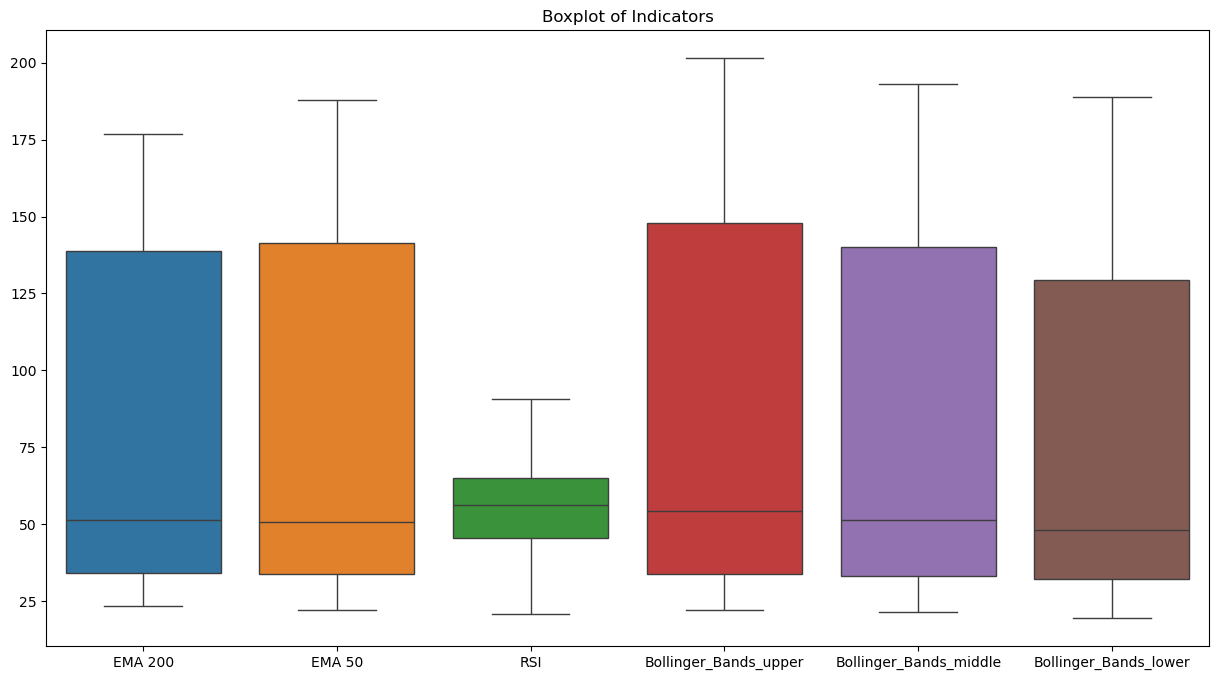

In [21]:
## Plotting Boxplot to check Outliers
plt.figure(figsize=(15,8))
sns.boxplot(data= indicators_df)
plt.title("Boxplot of Indicators")
plt.show()

In [22]:
## IQR method
Q1 = indicators_df.quantile(0.25)
Q3 = indicators_df.quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (indicators_df<lower_bound)|(indicators_df>upper_bound)

outlier_rows=indicators_df[outliers.any(axis=1)]
print(outlier_rows)

outliers_count=outliers.sum()
print(outliers_count)

Empty DataFrame
Columns: [(EMA 200, ), (EMA 50, ), (RSI, ), (Bollinger_Bands_upper, ), (Bollinger_Bands_middle, ), (Bollinger_Bands_lower, )]
Index: []
Price                   Ticker
EMA 200                           0
EMA 50                            0
RSI                               0
Bollinger_Bands_upper             0
Bollinger_Bands_middle            0
Bollinger_Bands_lower             0
dtype: int64


In [24]:
## Deleting the rows with NaN values
df = df.iloc[200:]

In [25]:
df.head()

Price,Close,High,Low,Open,Volume,EMA 200,EMA 50,RSI,Bollinger_Bands_upper,Bollinger_Bands_middle,Bollinger_Bands_lower
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,
Date,,,,,,,,,,,
2015-10-19,25.170046,25.174551,24.805099,24.960539,119036800,27.158017,25.573733,49.316757,25.885283,25.139748,24.394213
2015-10-20,25.629606,25.719717,24.965044,25.082186,195871200,27.142809,25.575924,54.857086,25.899358,25.143915,24.388471
2015-10-21,25.627356,26.037357,25.613838,25.681421,167180800,27.127730,25.577941,54.825478,25.874462,25.137607,24.400751
2015-10-22,26.019339,26.019339,25.703952,25.755766,166616400,27.116701,25.595251,59.231435,25.904828,25.143239,24.381649
2015-10-23,26.825825,26.859616,26.206317,26.289668,237467600,27.113807,25.643509,66.476063,26.211810,25.192462,24.173114


In [26]:
## Shifting the indicators
df['EMA 200'] = df['EMA 200'].shift(1)
df['EMA 50'] = df['EMA 50'].shift(1)
df['RSI'] = df['RSI'].shift(1)
df['Bollinger_Bands_upper'] = df['Bollinger_Bands_upper'].shift(1)
df['Bollinger_Bands_middle'] = df['Bollinger_Bands_middle'].shift(1)
df['Bollinger_Bands_lower'] = df['Bollinger_Bands_lower'].shift(1)

In [27]:
df.head()

Price,Close,High,Low,Open,Volume,EMA 200,EMA 50,RSI,Bollinger_Bands_upper,Bollinger_Bands_middle,Bollinger_Bands_lower
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,
Date,,,,,,,,,,,
2015-10-19,25.170046,25.174551,24.805099,24.960539,119036800,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-20,25.629606,25.719717,24.965044,25.082186,195871200,27.158017,25.573733,49.316757,25.885283,25.139748,24.394213
2015-10-21,25.627356,26.037357,25.613838,25.681421,167180800,27.142809,25.575924,54.857086,25.899358,25.143915,24.388471
2015-10-22,26.019339,26.019339,25.703952,25.755766,166616400,27.127730,25.577941,54.825478,25.874462,25.137607,24.400751
2015-10-23,26.825825,26.859616,26.206317,26.289668,237467600,27.116701,25.595251,59.231435,25.904828,25.143239,24.381649


In [28]:
df=df.iloc[1:]

In [29]:
df.head()

Price,Close,High,Low,Open,Volume,EMA 200,EMA 50,RSI,Bollinger_Bands_upper,Bollinger_Bands_middle,Bollinger_Bands_lower
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,
Date,,,,,,,,,,,
2015-10-20,25.629606,25.719717,24.965044,25.082186,195871200,27.158017,25.573733,49.316757,25.885283,25.139748,24.394213
2015-10-21,25.627356,26.037357,25.613838,25.681421,167180800,27.142809,25.575924,54.857086,25.899358,25.143915,24.388471
2015-10-22,26.019339,26.019339,25.703952,25.755766,166616400,27.127730,25.577941,54.825478,25.874462,25.137607,24.400751
2015-10-23,26.825825,26.859616,26.206317,26.289668,237467600,27.116701,25.595251,59.231435,25.904828,25.143239,24.381649
2015-10-26,25.969776,26.611811,25.888677,26.600549,265335200,27.113807,25.643509,66.476063,26.211810,25.192462,24.173114


In [30]:
df.isnull().sum()

Price                   Ticker
Close                   AAPL      0
High                    AAPL      0
Low                     AAPL      0
Open                    AAPL      0
Volume                  AAPL      0
EMA 200                           0
EMA 50                            0
RSI                               0
Bollinger_Bands_upper             0
Bollinger_Bands_middle            0
Bollinger_Bands_lower             0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2063 entries, 2015-10-20 to 2023-12-29
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (Close, AAPL)               2063 non-null   float64
 1   (High, AAPL)                2063 non-null   float64
 2   (Low, AAPL)                 2063 non-null   float64
 3   (Open, AAPL)                2063 non-null   float64
 4   (Volume, AAPL)              2063 non-null   int64  
 5   (EMA 200, )                 2063 non-null   float64
 6   (EMA 50, )                  2063 non-null   float64
 7   (RSI, )                     2063 non-null   float64
 8   (Bollinger_Bands_upper, )   2063 non-null   float64
 9   (Bollinger_Bands_middle, )  2063 non-null   float64
 10  (Bollinger_Bands_lower, )   2063 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 193.4 KB


In [32]:
df.index

DatetimeIndex(['2015-10-20', '2015-10-21', '2015-10-22', '2015-10-23',
               '2015-10-26', '2015-10-27', '2015-10-28', '2015-10-29',
               '2015-10-30', '2015-11-02',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=2063, freq=None)

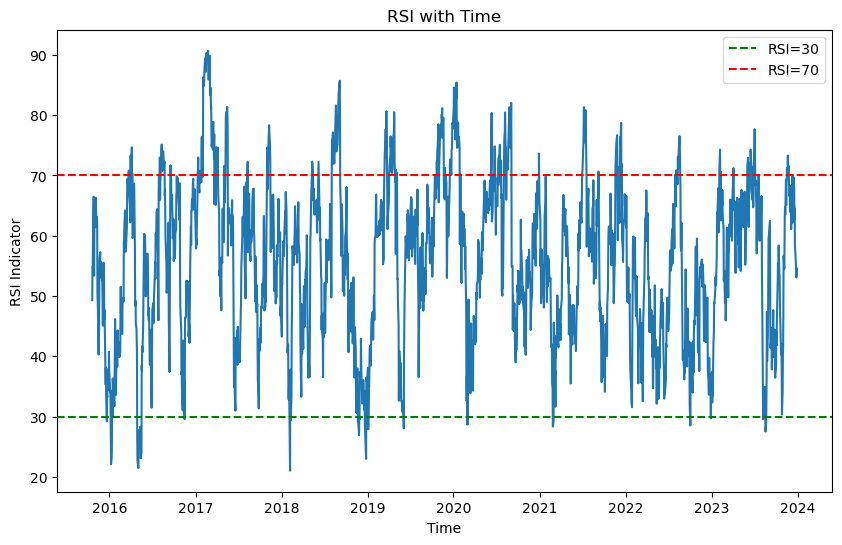

In [33]:
## Exploratory Data Analysis
plt.figure(figsize = (10,6))
plt.plot(df['RSI'])
plt.axhline(y=30, color='g', linestyle='--', label = 'RSI=30')
plt.axhline(y=70, color='r', linestyle='--', label = 'RSI=70')
plt.xlabel('Time')
plt.ylabel('RSI Indicator')
plt.title("RSI with Time")
plt.legend()
plt.show()

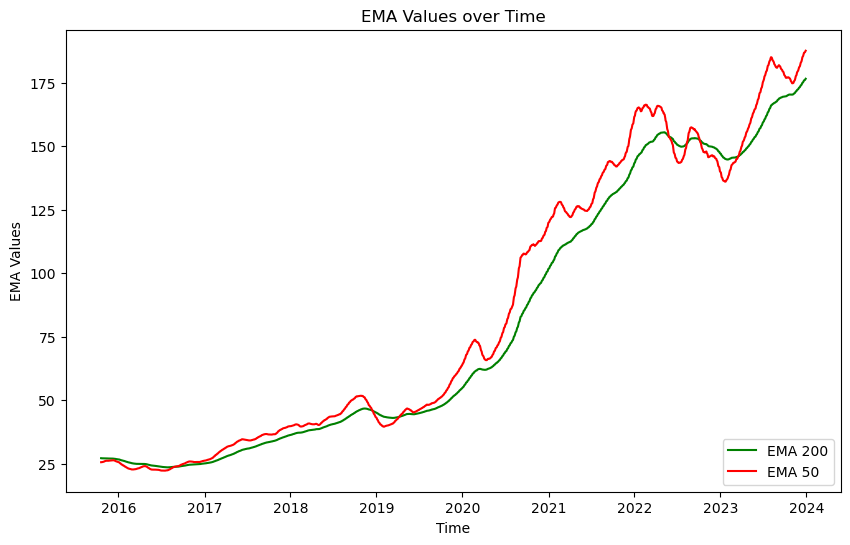

In [34]:
plt.figure(figsize = (10,6))
plt.plot(df['EMA 200'], label = "EMA 200", color='g')
plt.plot(df['EMA 50'], label = "EMA 50", color = 'r')
plt.xlabel('Time')
plt.ylabel('EMA Values')
plt.title("EMA Values over Time")
plt.legend(loc = 'lower right')
plt.show()

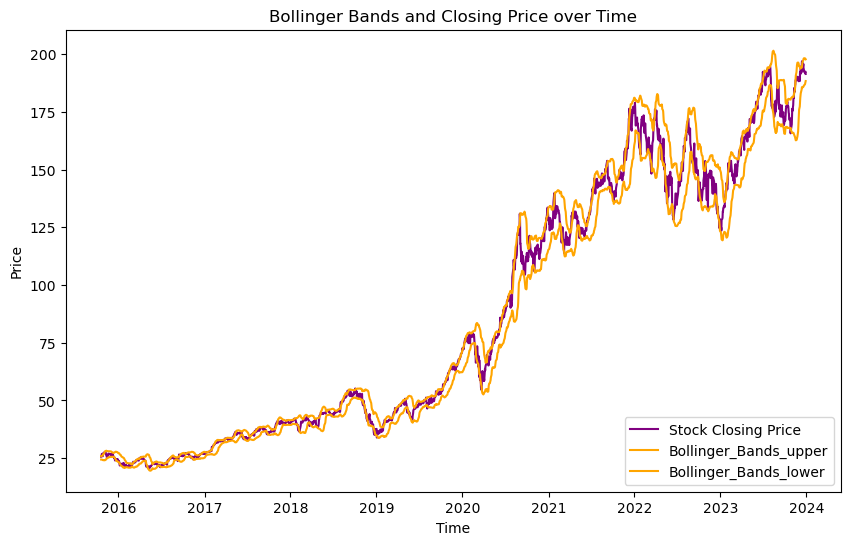

In [35]:
plt.figure(figsize = (10,6))
plt.plot(df['Close'], label = 'Stock Closing Price', color='purple')
plt.plot(df['Bollinger_Bands_upper'], label = "Bollinger_Bands_upper", color='orange')
plt.plot(df['Bollinger_Bands_lower'], label = "Bollinger_Bands_lower", color='orange')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title("Bollinger Bands and Closing Price over Time")
plt.legend(loc = 'lower right')
plt.show()

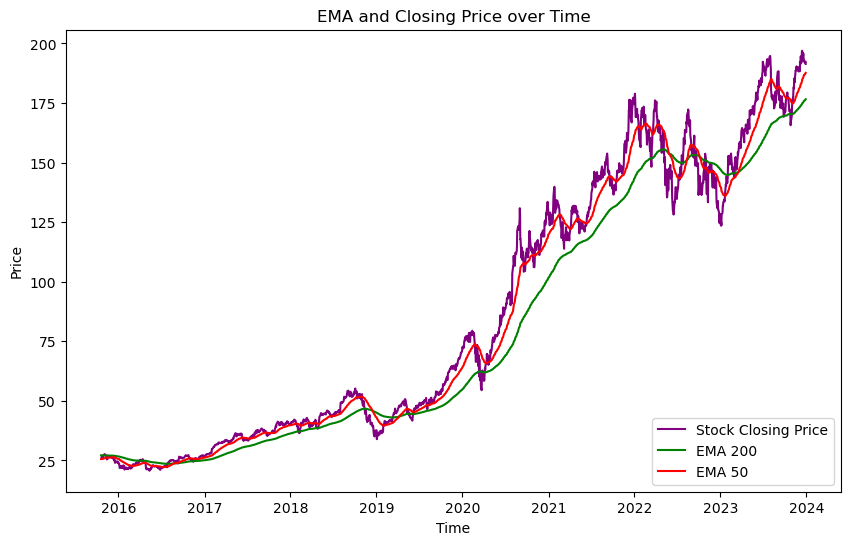

In [36]:
plt.figure(figsize = (10,6))
plt.plot(df['Close'], label = 'Stock Closing Price', color='purple')
plt.plot(df['EMA 200'], label = "EMA 200", color='g')
plt.plot(df['EMA 50'], label = "EMA 50", color = 'r')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title("EMA and Closing Price over Time")
plt.legend(loc = 'lower right')
plt.show()

In [37]:
corr = df[['Close','EMA 200','EMA 50','RSI','Bollinger_Bands_upper','Bollinger_Bands_lower','Bollinger_Bands_middle']].corr()

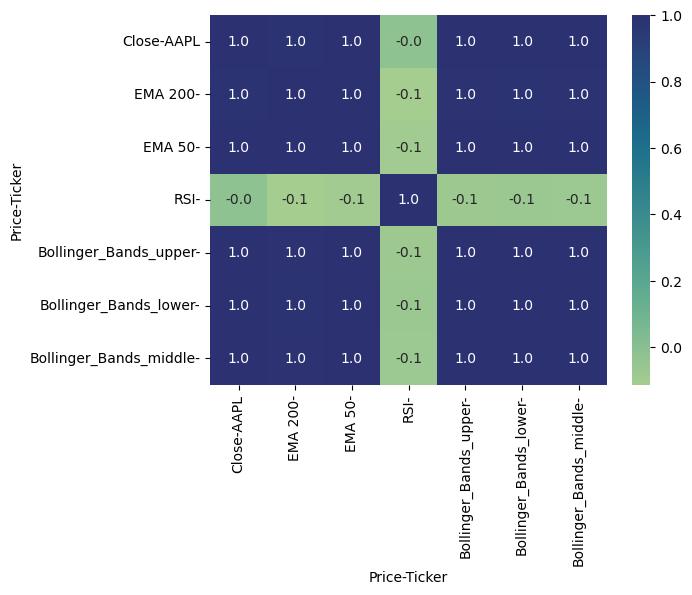

In [38]:
sns.heatmap(corr, annot=True, cmap = "crest", fmt = '0.1f')
plt.show()

<Figure size 1000x600 with 0 Axes>

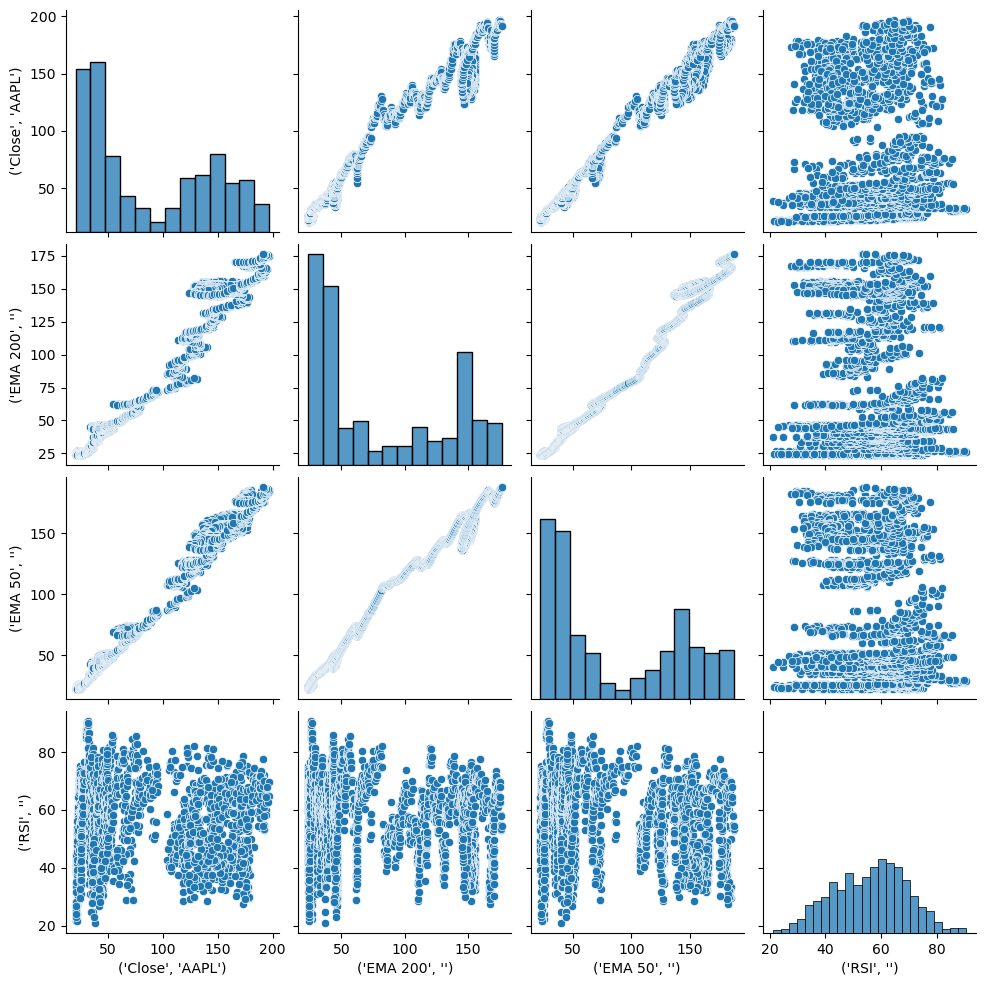

In [39]:
plt.figure(figsize=(10,6))
sns.pairplot(df[['Close','EMA 200','EMA 50','RSI']])
plt.show()

In [41]:
## Performing Train Test Split
from sklearn.model_selection import train_test_split
train_size = int(len(df)*0.8)
train,test = df.iloc[:train_size],df.iloc[train_size:]
x_train, y_train = train.drop(columns=['Close']),train['Close']
x_test, y_test = test.drop(columns=['Close']),test['Close']

In [42]:
x_train.head()

Price,High,Low,Open,Volume,EMA 200,EMA 50,RSI,Bollinger_Bands_upper,Bollinger_Bands_middle,Bollinger_Bands_lower
Ticker,AAPL,AAPL,AAPL,AAPL,,,,,,
Date,,,,,,,,,,
2015-10-20,25.719717,24.965044,25.082186,195871200,27.158017,25.573733,49.316757,25.885283,25.139748,24.394213
2015-10-21,26.037357,25.613838,25.681421,167180800,27.142809,25.575924,54.857086,25.899358,25.143915,24.388471
2015-10-22,26.019339,25.703952,25.755766,166616400,27.127730,25.577941,54.825478,25.874462,25.137607,24.400751
2015-10-23,26.859616,26.206317,26.289668,237467600,27.116701,25.595251,59.231435,25.904828,25.143239,24.381649
2015-10-26,26.611811,25.888677,26.600549,265335200,27.113807,25.643509,66.476063,26.211810,25.192462,24.173114


In [43]:
x_train.shape

(1650, 10)

In [44]:
x_test.shape

(413, 10)

In [45]:
y_train.shape

(1650, 1)

In [46]:
y_test.shape

(413, 1)

### Feature Selection

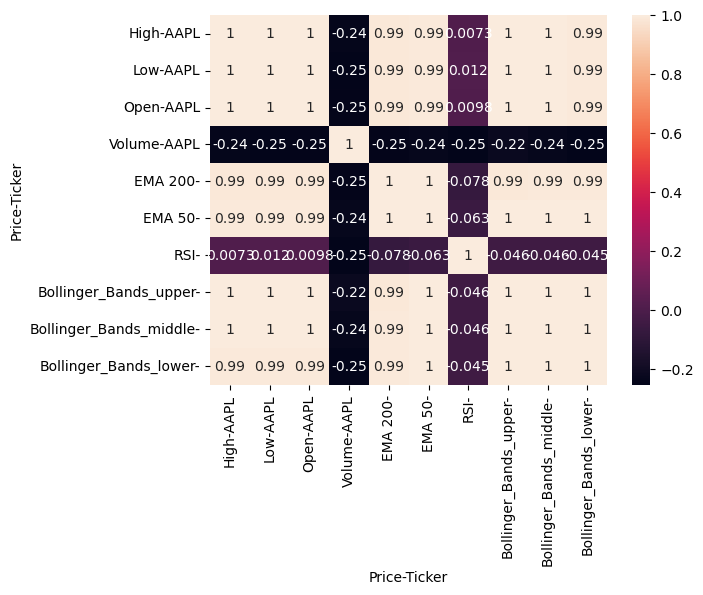

In [48]:
## Pearson Correlation
cor = x_train.corr()
sns.heatmap(cor,annot=True)
plt.show()

In [49]:
## Using below function to remove highly correlated features
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr    

In [50]:
corr_features = correlation(x_train, 0.8)
len(set(corr_features))

7

In [51]:
corr_features

{('Bollinger_Bands_lower', ''),
 ('Bollinger_Bands_middle', ''),
 ('Bollinger_Bands_upper', ''),
 ('EMA 200', ''),
 ('EMA 50', ''),
 ('Low', 'AAPL'),
 ('Open', 'AAPL')}

#### Lets keep EMA 200 and EMA 50 for now as they are quite important in checking the stock trend and remove the others

In [53]:
## Dropping multicollinear features
x_train=x_train.drop(x_train[['Bollinger_Bands_lower','Bollinger_Bands_middle','Bollinger_Bands_upper','Low','Open','EMA 50']], axis=1)
x_test=x_test.drop(x_test[['Bollinger_Bands_lower','Bollinger_Bands_middle','Bollinger_Bands_upper','Low','Open','EMA 50']], axis=1)

In [54]:
x_train.head()

Price,High,Volume,EMA 200,RSI
Ticker,AAPL,AAPL,,
Date,,,,
2015-10-20,25.719717,195871200,27.158017,49.316757
2015-10-21,26.037357,167180800,27.142809,54.857086
2015-10-22,26.019339,166616400,27.127730,54.825478
2015-10-23,26.859616,237467600,27.116701,59.231435
2015-10-26,26.611811,265335200,27.113807,66.476063


In [55]:
x_train.shape

(1650, 4)

In [56]:
x_test.shape

(413, 4)

## Standardization

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
## First doing the log transformation of values column
x_train['Volume'] = np.log1p(x_train['Volume'])
x_test['Volume']=np.log1p(x_test['Volume'])

In [60]:
scal = StandardScaler()
x_train_scaled = scal.fit_transform(x_train)
x_test_scaled = scal.transform(x_test)

In [61]:
x_train_scaled

array([[-0.93266588,  1.31062339, -0.85088837, -0.54269395],
       [-0.9258369 ,  0.91704469, -0.8512756 , -0.12546606],
       [-0.92622428,  0.90864115, -0.85165955, -0.12784644],
       ...,
       [ 1.98570822,  0.30198407,  2.41713022, -0.35709227],
       [ 1.89249974,  0.01147869,  2.4168169 , -1.10831676],
       [ 1.81601289,  0.32194361,  2.41669147, -1.03666275]])

## Model Implementation

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [144]:
def evaluate_model(true,predicted):
    mse = mean_squared_error(true,predicted)
    score= r2_score(true, predicted)
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mse)
    return mse, score, mae, rmse

In [146]:
models = {
    'Linear Regression':LinearRegression(),
    'Decision Tree':DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train_scaled,y_train)

    ## Make Predictions
    y_train_pred = model.predict(x_train_scaled)
    y_test_pred = model.predict(x_test_scaled)

    train_mse, train_r2_score, train_mae, train_rmse = evaluate_model(y_train,y_train_pred)
    test_mse, test_r2_score, test_mae, test_rmse = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])

    print("The Training Data Evaluations are as below:")
    print('-Mean Squared Error:{:.4f}'.format(train_mse))
    print('-R2 Score:{:.4f}'.format(train_r2_score))
    print('-Mean Absolute Error:{:.4f}'.format(train_mae))
    print('-Root Mean Squared Error:{:.4f}'.format(train_rmse))

    print('---------------------------------------------------------')

    print("The Test Data Evaluations are as below:")
    print('-Mean Squared Error:{:.4f}'.format(test_mse))
    print('-R2 Score:{:.4f}'.format(test_r2_score))
    print('-Mean Absolute Error:{:.4f}'.format(test_mae))
    print('-Root Mean Squared Error:{:.4f}'.format(test_rmse))

    print('='*35)
    print('\n')

Linear Regression
The Training Data Evaluations are as below:
-Mean Squared Error:0.7264
-R2 Score:0.9997
-Mean Absolute Error:0.5246
-Root Mean Squared Error:0.8523
---------------------------------------------------------
The Test Data Evaluations are as below:
-Mean Squared Error:2.0267
-R2 Score:0.9946
-Mean Absolute Error:1.1086
-Root Mean Squared Error:1.4236


Decision Tree
The Training Data Evaluations are as below:
-Mean Squared Error:0.0000
-R2 Score:1.0000
-Mean Absolute Error:0.0000
-Root Mean Squared Error:0.0000
---------------------------------------------------------
The Test Data Evaluations are as below:
-Mean Squared Error:39.2943
-R2 Score:0.8944
-Mean Absolute Error:3.8215
-Root Mean Squared Error:6.2685


RandomForest
The Training Data Evaluations are as below:
-Mean Squared Error:0.1354
-R2 Score:0.9999
-Mean Absolute Error:0.2108
-Root Mean Squared Error:0.3679
---------------------------------------------------------
The Test Data Evaluations are as below:
-Mea

In [66]:
rf_params = {
    'n_estimators':[100,200,500,1000],
    'max_depth':[5,8,15,None,10],
    'max_features':[5,7,"auto",8,10],
    'min_samples_split':[2,8,15,20]
}
gb_params = {
    'n_estimators':[100,200,300,500,1000],
    'learning_rate':[0.1,0.001,0.01,1],
    'max_depth':[5,8,15,None,10]
}
xgb_params = {
    'n_estimators':[100,200,300,500,1000],
    'learning_rate':[0.1,0.001,0.01,1],
    'max_depth':[5,8,15,None,10],
    'colsample_bytree':[0.3,0.5,0.7,1.0]
}

In [67]:
random_cvmodels = [('RF',RandomForestRegressor(),rf_params),
                  ('GB',GradientBoostingRegressor(),gb_params),
                  ('XGB',XGBRegressor(),xgb_params)]

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit

In [69]:
model_param={}
for name,model,params in random_cvmodels:
    random = RandomizedSearchCV(estimator = model, param_distributions=params, n_iter=100, cv=TimeSeriesSplit(n_splits=5), verbose=2, n_jobs=-1)
    random.fit(x_train_scaled,y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f'--------------------Best Params for {model_name}:-----------------------')
    print(model_param[model_name])

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
--------------------Best Params for RF:-----------------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 5, 'max_depth': 8}
--------------------Best Params for GB:-----------------------
{'n_estimators': 200, 'max_depth': None, 'learning_rate': 1}
--------------------Best Params for XGB:-----------------------
{'n_estimators': 500, 'max_depth': 8, 'learning_rate': 1, 'colsample_bytree': 0.5}


In [148]:
## Now tring with hypertuned parameters
models = {
    'Linear Regression':LinearRegression(),
    'Decision Tree':DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(n_estimators= 200, min_samples_split= 2, max_features= 5, max_depth= 8),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=300, max_depth=10, learning_rate=1),
    'XGBoost': XGBRegressor(n_estimators=100, max_depth=5, learning_rate=1, colsample_bynode=0.7)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train_scaled,y_train)

    ## Make Predictions
    y_train_pred = model.predict(x_train_scaled)
    y_test_pred = model.predict(x_test_scaled)

    train_mse, train_r2_score, train_mae, train_rmse = evaluate_model(y_train,y_train_pred)
    test_mse, test_r2_score, test_mae, test_rmse = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])

    print("The Training Data Evaluations are as below:")
    print('-Mean Squared Error:{:.4f}'.format(train_mse))
    print('-R2 Score:{:.4f}'.format(train_r2_score))
    print('-Mean Absolute Error:{:.4f}'.format(train_mae))
    print('-Root Mean Squared Error:{:.4f}'.format(train_rmse))

    print('---------------------------------------------------------')

    print("The Test Data Evaluations are as below:")
    print('-Mean Squared Error:{:.4f}'.format(test_mse))
    print('-R2 Score:{:.4f}'.format(test_r2_score))
    print('-Mean Absolute Error:{:.4f}'.format(test_mae))
    print('-Root Mean Squared Error:{:.4f}'.format(test_rmse))

    print('='*35)
    print('\n')

Linear Regression
The Training Data Evaluations are as below:
-Mean Squared Error:0.7264
-R2 Score:0.9997
-Mean Absolute Error:0.5246
-Root Mean Squared Error:0.8523
---------------------------------------------------------
The Test Data Evaluations are as below:
-Mean Squared Error:2.0267
-R2 Score:0.9946
-Mean Absolute Error:1.1086
-Root Mean Squared Error:1.4236


Decision Tree
The Training Data Evaluations are as below:
-Mean Squared Error:0.0000
-R2 Score:1.0000
-Mean Absolute Error:0.0000
-Root Mean Squared Error:0.0000
---------------------------------------------------------
The Test Data Evaluations are as below:
-Mean Squared Error:43.5230
-R2 Score:0.8830
-Mean Absolute Error:4.0605
-Root Mean Squared Error:6.5972


RandomForest
The Training Data Evaluations are as below:
-Mean Squared Error:0.2318
-R2 Score:0.9999
-Mean Absolute Error:0.3109
-Root Mean Squared Error:0.4815
---------------------------------------------------------
The Test Data Evaluations are as below:
-Mea

In [161]:
## Plotting Actual vs Predicted
lr=LinearRegression()
lr.fit(x_train_scaled,y_train)
y_test_pred = lr.predict(x_test_scaled)

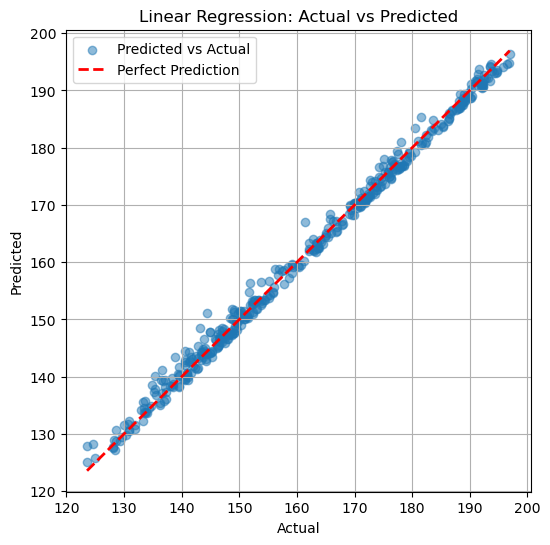

In [163]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_test_pred,alpha=0.5,label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

## Conclusion
In this project, I set out to predict stock prices using historical data from 2015 to 2023. I focused on building meaningful features rooted in financial domain knowledge, including 50-day EMA, 200-day EMA, and Relative Strength Index (RSI). After analyzing feature correlations, I dropped Bollinger Bands to avoid redundancy, though I retained both EMAs due to their practical relevance in identifying trend shifts.

I trained and compared a range of regression models—Linear Regression, Decision Tree, Random Forest, Gradient Boosting and XGBoost—and evaluated them using a consistent metric function for efficiency and clarity.

Among all models, Linear Regression performed best on the test set with an R² score of 0.9946, indicating strong generalization. Tree-based models, despite showing near-perfect results on training data, tended to overfit. Hyperparameter tuning improved some of these models, but none surpassed the simplicity and reliability of Linear Regression in this case.

Running each model through a reusable function not only helped streamline the workflow but also ensured fair, consistent comparisons across all models.